In [1]:
import pandas as pd

df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [2]:

print(df.isnull().sum())

df = df.dropna(subset=['originalPrice'])

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)

df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])


productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


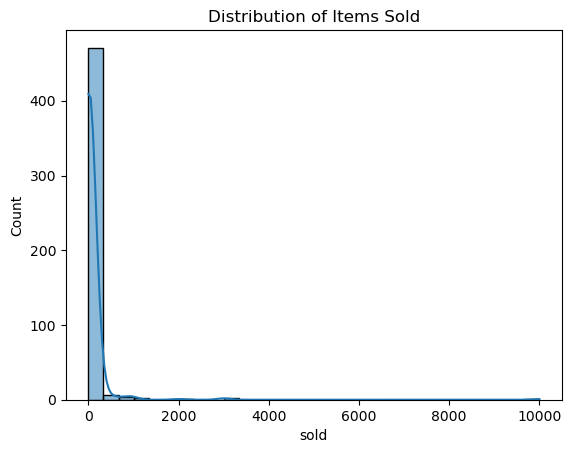

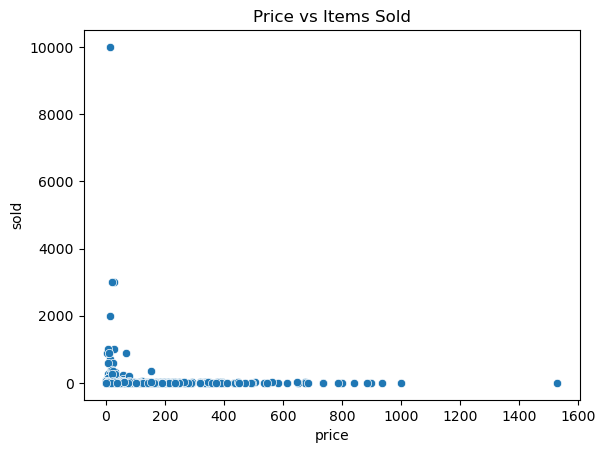

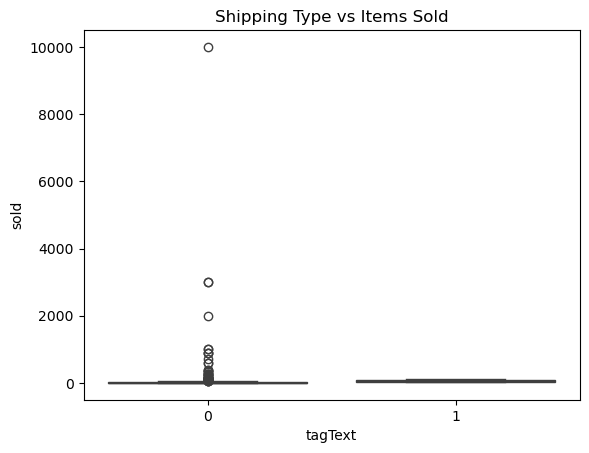

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sold
sns.histplot(df['sold'], bins=30, kde=True)
plt.title("Distribution of Items Sold")
plt.show()

# Price vs Sold
sns.scatterplot(x='price', y='sold', data=df)
plt.title("Price vs Items Sold")
plt.show()

# Boxplot by Shipping Type
sns.boxplot(x='tagText', y='sold', data=df)
plt.title("Shipping Type vs Items Sold")
plt.show()


In [4]:
df['discount_percent'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50)
title_tfidf = tfidf.fit_transform(df['productTitle'])
title_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

df = pd.concat([df, title_df], axis=1)
df.drop('productTitle', axis=1, inplace=True)


In [6]:
df = df.dropna()


In [8]:
df = df.dropna()

X = df.drop('sold', axis=1)
y = df['sold']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_pred = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R2:", r2_score(y_test, lr_pred))

# Random Forest
rf_pred = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))


Linear Regression MSE: 136560.039103507
Linear Regression R2: -503.49333310000276
Random Forest MSE: 14585.50428
Random Forest R2: -52.88318367120757


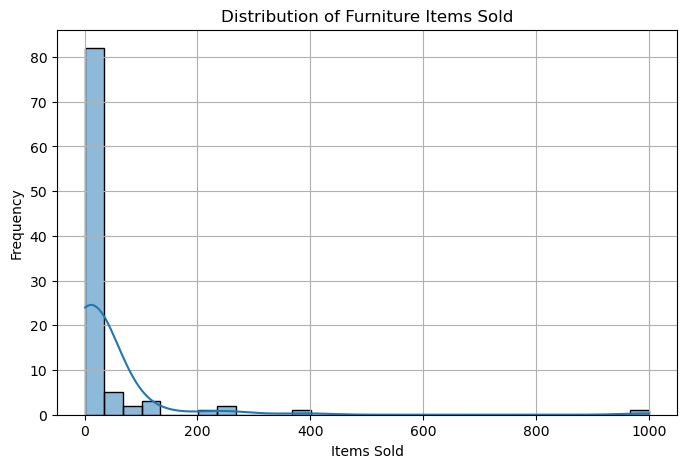

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['sold'], bins=30, kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.xlabel('Items Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


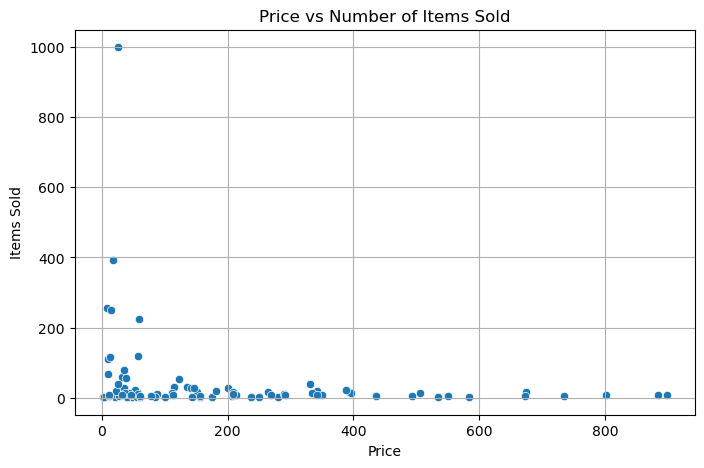

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Number of Items Sold')
plt.xlabel('Price')
plt.ylabel('Items Sold')
plt.grid(True)
plt.show()


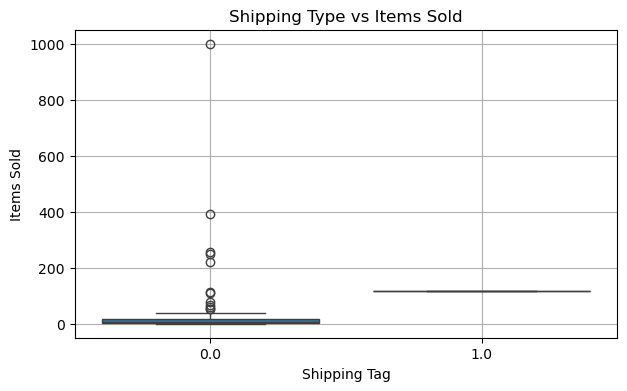

In [14]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='tagText', y='sold', data=df)
plt.title('Shipping Type vs Items Sold')
plt.xlabel('Shipping Tag')
plt.ylabel('Items Sold')
plt.grid(True)
plt.show()


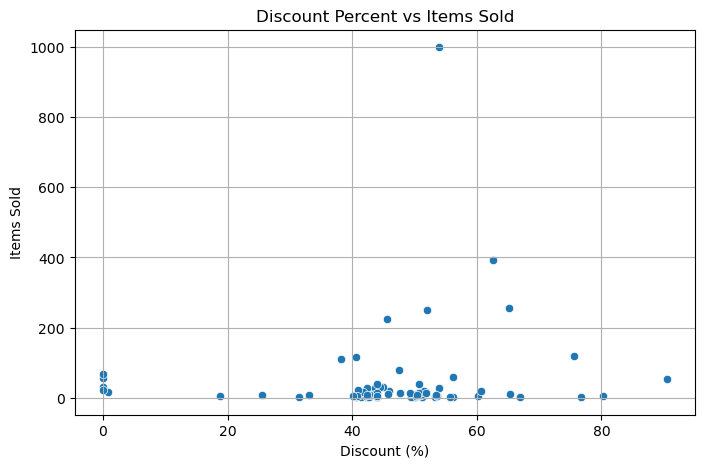

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='discount_percent', y='sold', data=df)
plt.title('Discount Percent vs Items Sold')
plt.xlabel('Discount (%)')
plt.ylabel('Items Sold')
plt.grid(True)
plt.show()
